In [1]:
# Libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import csv

import requests
import os, json, time, random, datetime as dt

import praw
from prawcore.exceptions import RequestException, ResponseException, ServerError, Forbidden, TooManyRequests

## Reddit API

In [ ]:
https://www.reddit.com/api/v1/authorize?client_id=CLIENT_ID&response_type=TYPE&
    state=RANDOM_STRING&redirect_uri=URI&duration=DURATION&scope=SCOPE_STRING

In [7]:
len("dqXuuOK3P0c5rM9twm71nw")

22

In [ ]:

# credentials
CLIENT_ID = "dqXuuOK3P0c5rM9twm71nw"
CLIENT_SECRET = "bATSC1DE_28YvrYs2vDm2Noc8LG9Tg"
USER_AGENT = "AFL-sentiment-script:v1.0 (by u/GoldRelative4814)"

# Connect to Reddit API
reddit = praw.Reddit(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    user_agent=USER_AGENT
)

# pull 10 hottest posts from r/AFL
subreddit = reddit.subreddit("AFL")
posts = []
for post in subreddit.hot(limit=10):
    posts.append({
        "id": post.id,
        "title": post.title,
        "score": post.score,
        "num_comments": post.num_comments,
        "created_utc": post.created_utc,
        "url": post.url
    })

df_posts = pd.DataFrame(posts)
print(df_posts)

        id                                              title  score  \
0  1nh6qqe                              Ticketek are hopeless     73   
1  1ni3xol  AFL ripped for 'doing absolutely nothing' abou...    389   
2  1ni87r6  North Melbourne captain Jy Simpkin exploring b...    175   
3  1ni9h6w  Zach Merrett is furious at reports he acted di...    127   
4  1ni50ah                           Wayne’s world goes wrong    178   
5  1ni65wv  [7News] Adelaide will ask the question of Melb...    141   
6  1ni3e4f  Tom Liberatore tattoo in the style of The Simp...    165   
7  1ni6mm9            Anyone thinking of going to this event?    102   
8  1ni9n1l                                 Double MCG Sellout     57   
9  1ni1gvy  [Jon Ralph] There is acceptance at Essendon th...    186   

   num_comments   created_utc  \
0           121  1.757894e+09   
1           167  1.757985e+09   
2           225  1.757998e+09   
3           176  1.758002e+09   
4            76  1.757988e+09   
5        

In [9]:
# Example: fetch comments from the first post
submission = reddit.submission(id=df_posts.loc[0, "id"])
submission.comments.replace_more(limit=None)  # load all nested comments

comments = []
for comment in submission.comments.list():
    comments.append({
        "id": comment.id,
        "author": str(comment.author),
        "score": comment.score,
        "created_utc": comment.created_utc,
        "body": comment.body
    })

df_comments = pd.DataFrame(comments)
print(df_comments.head())

# Save to CSV
df_comments.to_csv("afl_comments.csv", index=False)

        id                author  score   created_utc  \
0  ne9jn2m          JRicho_Sauce    129  1.757896e+09   
1  ne9o6cn                  woka     49  1.757898e+09   
2  nea2ks1  Swimming-Session8806     21  1.757903e+09   
3  ne9trev  Specialist_Current98     11  1.757900e+09   
4  ne9qnp5          AlexJokerHAL     15  1.757899e+09   

                                                body  
0  Pretty confident it’s random from waiting room...  
1  Wait until you try and pay and you get a gatew...  
2  MCC are to blame for this.  \n\nPrelim(s) shou...  
3  A couple months ago, my brother, dad and mysel...  
4  MCC - Oh well. Guess you have to go line up at...  


In [11]:
df_comments

,id,author,score,created_utc,body
0,ne9jn2m,JRicho_Sauce,129,1.757896e+09,Pretty confident it’s random from waiting room...
1,ne9o6cn,woka,49,1.757898e+09,Wait until you try and pay and you get a gatew...
2,nea2ks1,Swimming-Session8806,21,1.757903e+09,MCC are to blame for this. \n\nPrelim(s) shou...
3,ne9trev,Specialist_Current98,11,1.757900e+09,"A couple months ago, my brother, dad and mysel..."
4,ne9qnp5,AlexJokerHAL,15,1.757899e+09,MCC - Oh well. Guess you have to go line up at...
...,...,...,...,...,...
118,neboian,nuffiealert,3,1.757933e+09,What a bizarre narrative you have created ther...
119,nebaa9z,hamleyn248,0,1.757925e+09,Thanks. That's super helpful. You know what th...
120,nebu4eu,BustedWing,0,1.757936e+09,"I mean, if you say so!"
121,nebafmy,identikit12,1,1.757925e+09,I do - and you’re the only one who assumed any...


In [10]:
df_posts

,id,title,score,num_comments,created_utc,url
0,1nh6qqe,Ticketek are hopeless,73,121,1.757894e+09,https://www.reddit.com/r/AFL/comments/1nh6qqe/...
1,1ni3xol,AFL ripped for 'doing absolutely nothing' abou...,389,167,1.757985e+09,https://www.nine.com.au/sport/afl/news-2025-ge...
2,1ni87r6,North Melbourne captain Jy Simpkin exploring b...,175,225,1.757998e+09,https://7news.com.au/sport/afl/north-melbourne...
3,1ni9h6w,Zach Merrett is furious at reports he acted di...,127,176,1.758002e+09,https://archive.is/igeDr
4,1ni50ah,Wayne’s world goes wrong,178,76,1.757988e+09,https://i.redd.it/zf8e79u8pfpf1.jpeg
5,1ni65wv,[7News] Adelaide will ask the question of Melb...,141,106,1.757991e+09,https://i.redd.it/1ym1qab5zfpf1.png
6,1ni3e4f,Tom Liberatore tattoo in the style of The Simp...,165,13,1.757984e+09,https://i.redd.it/i7qd8ybvbfpf1.jpeg
7,1ni6mm9,Anyone thinking of going to this event?,102,59,1.757993e+09,https://i.redd.it/k01oztoa3gpf1.jpeg
8,1ni9n1l,Double MCG Sellout,57,31,1.758003e+09,https://www.reddit.com/gallery/1ni9n1l
9,1ni1gvy,[Jon Ralph] There is acceptance at Essendon th...,186,320,1.757978e+09,https://i.redd.it/a18tyfziwepf1.jpeg


## Scale up

### Posts

In [75]:
# credentials
CLIENT_ID = "dqXuuOK3P0c5rM9twm71nw"
CLIENT_SECRET = "bATSC1DE_28YvrYs2vDm2Noc8LG9Tg"
USER_AGENT = "AFL-sentiment-script:v1.0 (by u/GoldRelative4814)"

# Connect to Reddit API
reddit = praw.Reddit(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    user_agent=USER_AGENT
)


# -----------------------------
# 2) Config
# -----------------------------
SUBREDDIT = "AFL"
OUT_POSTS = "afl_posts.parquet" # incremental append
CHECKPOINT = "afl_posts_checkpoint.json"

# Season window in UTC 
SEASON_START = dt.datetime(2025, 8, 1, tzinfo=dt.timezone.utc)
SEASON_END   = dt.datetime(2025, 8, 31, tzinfo=dt.timezone.utc)

# Save every N matched posts to avoid losing work
SAVE_EVERY = 100

# -----------------------------
# 3) Helpers
# -----------------------------
def load_checkpoint():
    if os.path.exists(CHECKPOINT):
        with open(CHECKPOINT, "r") as f:
            return json.load(f)
    return {"last_created_utc": None, "seen_ids": []}

def save_checkpoint(state):
    with open(CHECKPOINT, "w") as f:
        json.dump(state, f)

def rate_limit_backoff(attempt):
    # Exponential backoff with jitter (cap at ~2 minutes)
    sleep_s = min(120, (2 ** min(attempt, 6)) + random.uniform(0, 1))
    time.sleep(sleep_s)

def title_matches(t):
    t_low = (t or "").lower()
    return any(k in t_low for k in TITLE_KEYWORDS)

def within_season(ts_utc):
    return SEASON_START.timestamp() <= ts_utc <= SEASON_END.timestamp()

def to_dt(ts_utc):
    return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)

def append_parquet(df, path):
    if df.empty:
        return
    if not os.path.exists(path):
        df.to_parquet(path, index=False)
    else:
        # append by reading and concatenating (simple + safe)
        old = pd.read_parquet(path)
        out = pd.concat([old, df], ignore_index=True)
        out.drop_duplicates(subset=["id"], inplace=True)
        out.to_parquet(path, index=False)

def append_csv(df, path):
    if df.empty:
        return
    if not os.path.exists(path):
        df.to_csv(path, index=False)
    else:
        df.to_csv(path, mode="a", header=False, index=False)

# -----------------------------
# 4) Harvest posts for a season
# -----------------------------
def harvest_season_posts():
    state = load_checkpoint()
    seen_ids = set(state.get("seen_ids", []))
    last_created_utc = state.get("last_created_utc")

    sub = reddit.subreddit(SUBREDDIT)

    # We’ll iterate from newest to oldest; stop when we pass SEASON_START
    matched = []
    total_seen = 0
    saved = 0
    attempt = 0

    print(f"Scanning r/{SUBREDDIT} .new() for season window "
          f"{SEASON_START.date()} — {SEASON_END.date()} (UTC).")

    while True:
        try:
            # PRAW paginates for us; limit=None walks through history
            for post in sub.new(limit=None):
                total_seen += 1

                # Stop if we've gone past season start
                if post.created_utc < SEASON_START.timestamp():
                    print("Reached posts older than SEASON_START; stopping.")
                    raise StopIteration

                # Skip if beyond season end (we’re going backward in time, so this just continues)
                if post.created_utc > SEASON_END.timestamp():
                    continue

                # Skip duplicates
                if post.id in seen_ids:
                    continue

                # # Filter by title keywords if desired
                # if not title_matches(post.title):
                #     continue

                matched.append({
                    "id": post.id,
                    "title": post.title,
                    "author": str(post.author) if post.author else None,
                    "score": post.score,
                    "num_comments": post.num_comments,
                    "created_utc": post.created_utc,
                    "created_datetime_utc": to_dt(post.created_utc).isoformat(),
                    "url": post.url,
                    "permalink": f"https://www.reddit.com{post.permalink}",
                    "subreddit": str(post.subreddit),
                    "over_18": post.over_18,
                    "locked": post.locked,
                    "stickied": post.stickied,
                    "is_self": post.is_self,
                    "selftext": post.selftext if post.is_self else None,
                })
                seen_ids.add(post.id)

                # Periodic save
                if len(matched) >= SAVE_EVERY:
                    df = pd.DataFrame(matched)
                    append_csv(df, OUT_POSTS.replace(".parquet", ".csv"))
                    saved += len(df)
                    matched.clear()
                    # update checkpoint
                    state = {
                        "last_created_utc": post.created_utc,
                        "seen_ids": list(seen_ids),
                    }
                    save_checkpoint(state)
                    print(f"Saved {saved} posts so far "
                          f"(total scanned: {total_seen:,}).")
            # If loop exhausts (rare), break
            break

        except StopIteration:
            # Save what we have and exit cleanly
            if matched:
                df = pd.DataFrame(matched)
                append_csv(df, OUT_POSTS.replace(".parquet", ".csv"))
                saved += len(df)
                matched.clear()
            state = {
                "last_created_utc": last_created_utc,
                "seen_ids": list(seen_ids),
            }
            save_checkpoint(state)
            print(f"Done. Total scanned: {total_seen:,}. Total saved: {saved}.")
            return

        except (TooManyRequests, ServerError, RequestException, ResponseException, Forbidden) as e:
            attempt += 1
            print(f"[WARN] API/Ratelimit error ({type(e).__name__}): {e}. "
                  f"Backing off (attempt {attempt})…")
            rate_limit_backoff(attempt)
            # loop continues and resumes

    # Final flush
    if matched:
        df = pd.DataFrame(matched)
        append_csv(df, OUT_POSTS.replace(".parquet", ".csv"))
        saved += len(df)
        matched.clear()
    state = {
        "last_created_utc": last_created_utc,
        "seen_ids": list(seen_ids),
    }
    save_checkpoint(state)
    print(f"Complete. Total scanned: {total_seen:,}. Total saved: {saved}.")


In [76]:
# -----------------------------
# 6) Run
# -----------------------------
if __name__ == "__main__":
    harvest_season_posts()

Scanning r/AFL .new() for season window 2025-08-01 — 2025-08-31 (UTC).
Complete. Total scanned: 990. Total saved: 0.


In [4]:
# Version2
# helper backoff
def rate_limit_backoff(attempt):
    time.sleep(min(120, (2 ** min(attempt, 6)) + random.uniform(0, 1)))

def _write_csv_append(df, path):
    if df.empty: return 0
    header = not os.path.exists(path)
    df.to_csv(path, mode="a", header=header, index=False)
    return len(df)

def _epoch(dt_utc):  # datetime -> epoch seconds
    return int(dt_utc.timestamp())

def harvest_by_time_chunks(reddit, start_utc: dt.datetime, end_utc: dt.datetime):
    """Fetch posts via timestamp search in small chunks to avoid listing cap."""
    assert start_utc.tzinfo and end_utc.tzinfo, "Use tz-aware UTC datetimes"
    sr = reddit.subreddit(SUBREDDIT)

    # load seen ids from disk to avoid duplicates
    seen = set()
    if os.path.exists(OUT_CSV):
        try:
            for ch in pd.read_csv(OUT_CSV, usecols=["id"], chunksize=200_000, dtype={"id": str}):
                seen.update(ch["id"].astype(str))
        except Exception:
            pass

    saved_total = 0
    attempt = 0

    # walk windows newest->oldest (optional direction)
    chunk = dt.timedelta(days=CHUNK_DAYS)
    cur_end = end_utc
    while cur_end > start_utc:
        cur_start = max(start_utc, cur_end - chunk)

        q = f"timestamp:{_epoch(cur_start)}..{_epoch(cur_end)}"
        print(f"Querying {cur_start.date()} → {cur_end.date()}")

        try:
            rows = []
            # restrict_sr ensures we only search r/AFL
            for post in sr.search(q, sort="new", syntax="cloudsearch", limit=None, params={"restrict_sr": "on"}):
                if post.id in seen:
                    continue
                rows.append({
                    "id": post.id,
                    "title": post.title,
                    "author": str(post.author) if post.author else None,
                    "score": post.score,
                    "num_comments": post.num_comments,
                    "created_utc": post.created_utc,
                    "created_datetime_utc": dt.datetime.utcfromtimestamp(post.created_utc).replace(tzinfo=dt.timezone.utc).isoformat(),
                    "url": post.url,
                    "permalink": f"https://www.reddit.com{post.permalink}",
                    "subreddit": str(post.subreddit),
                    "over_18": post.over_18,
                    "locked": post.locked,
                    "stickied": post.stickied,
                    "is_self": post.is_self,
                    "selftext": post.selftext if post.is_self else None,
                })
                seen.add(post.id)

                # periodic flush
                if len(rows) >= SAVE_EVERY:
                    saved = _write_csv_append(pd.DataFrame(rows), OUT_CSV)
                    saved_total += saved
                    rows.clear()
                    print(f"Saved {saved_total} so far…")

            # final flush for this chunk
            if rows:
                saved = _write_csv_append(pd.DataFrame(rows), OUT_CSV)
                saved_total += saved
                rows.clear()
                print(f"Saved {saved_total} so far…")

            # move to previous chunk
            cur_end = cur_start
            attempt = 0  # reset retry counter

        except (TooManyRequests, ServerError, RequestException, ResponseException, Forbidden) as e:
            attempt += 1
            print(f"[WARN] API error: {type(e).__name__}: {e}. Backing off…")
            rate_limit_backoff(attempt)

    print(f"Done. Total saved this run: {saved_total}")

In [5]:
# credentials
CLIENT_ID = "0KyeTUkOGI_aCRThrKdW8A"
CLIENT_SECRET = "XJobdO1yHPePWuFO8NwACSh_V1X36Q"
USER_AGENT = "AFL-sentiment-script:v2.0 (by u/GoldRelative4814)"


# Connect to Reddit API
reddit = praw.Reddit(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    user_agent=USER_AGENT
)

In [6]:
# ----- config you already have -----
SUBREDDIT = "AFL"
OUT_CSV   = "afl_posts.csv"
CKPT      = "afl_posts_checkpoint.json"   # per-project; optional
CHUNK_DAYS = 2                             # 1–3 days is usually good
SAVE_EVERY = 200

SEASON_START = dt.datetime(2025, 7, 1, tzinfo=dt.timezone.utc)
SEASON_END   = dt.datetime(2025, 7, 31, tzinfo=dt.timezone.utc)

harvest_by_time_chunks(reddit, SEASON_START, SEASON_END)

Querying 2025-07-29 → 2025-07-31
Querying 2025-07-27 → 2025-07-29
Querying 2025-07-25 → 2025-07-27
Querying 2025-07-23 → 2025-07-25
Querying 2025-07-21 → 2025-07-23
Querying 2025-07-19 → 2025-07-21
Querying 2025-07-17 → 2025-07-19
Querying 2025-07-15 → 2025-07-17
Querying 2025-07-13 → 2025-07-15
Querying 2025-07-11 → 2025-07-13
Querying 2025-07-09 → 2025-07-11
Querying 2025-07-07 → 2025-07-09
Querying 2025-07-05 → 2025-07-07
Querying 2025-07-03 → 2025-07-05
Querying 2025-07-01 → 2025-07-03
Done. Total saved this run: 0


In [82]:
df_check = pd.read_csv("afl_posts.csv")

In [78]:
new_list = df_check.id
new_list

0       1nickz6
1       1nic2vv
2       1nibktl
3       1nibhj5
4       1nibdt3
         ...   
1052    1nieywu
1053    1nidwf7
1054    1nidttk
1055    1nidted
1056    1nid9il
Name: id, Length: 1057, dtype: object

In [79]:

diff_a = list(set(new_list) - set(old_list))  
diff_a

[]

In [74]:
old_list = df_check.id
old_list

0       1nickz6
1       1nic2vv
2       1nibktl
3       1nibhj5
4       1nibdt3
         ...   
1052    1nieywu
1053    1nidwf7
1054    1nidttk
1055    1nidted
1056    1nid9il
Name: id, Length: 1057, dtype: object

### Comments

In [ ]:
# credentials
CLIENT_ID = "dqXuuOK3P0c5rM9twm71nw"
CLIENT_SECRET = "bATSC1DE_28YvrYs2vDm2Noc8LG9Tg"
USER_AGENT = "AFL-sentiment-script:v1.0 (by u/GoldRelative4814)"

# Connect to Reddit API
reddit = praw.Reddit(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    user_agent=USER_AGENT
)

def to_dt(ts_utc):
    return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)

    
def _load_existing_comment_ids(csv_path: str, id_col: str = "id") -> set:
    """Load existing comment IDs from an existing CSV (fast enough for typical sizes)."""
    if not os.path.exists(csv_path):
        return set()
    ids = set()
    # Read in chunks to keep memory sane
    for chunk in pd.read_csv(csv_path, usecols=[id_col], chunksize=200_000, dtype={id_col: str}):
        ids.update(chunk[id_col].astype(str).tolist())
    return ids

def _flush_comments_csv(rows, out_csv, seen_ids):
    """Append unique rows to CSV; update seen_ids."""
    if not rows:
        return 0
    df = pd.DataFrame(rows)
    # ensure string ids
    df["id"] = df["id"].astype(str)
    # drop any dupes already in file
    df = df[~df["id"].isin(seen_ids)]
    if df.empty:
        rows.clear()
        return 0
    write_header = not os.path.exists(out_csv)
    df.to_csv(out_csv, mode="a", header=write_header, index=False, quoting=csv.QUOTE_MINIMAL)
    # update seen set
    seen_ids.update(df["id"].tolist())
    rows.clear()
    return len(df)

def fetch_comments_for_posts_csv(posts_csv="afl_posts.csv",
                                 out_csv="afl_comments.csv",
                                 checkpoint_path="afl_comments.ckpt",
                                 max_depth=None,
                                 flush_every=5000):
    """
    Read submission IDs from posts_csv (must have a column 'id'),
    fetch all comments for each submission, and append to out_csv (CSV).
    Respects rate limits with backoff and can resume via checkpoint.
    """
    if not os.path.exists(posts_csv):
        print("No posts file found.")
        return

    # Load post IDs
    posts = pd.read_csv(posts_csv, usecols=["id"], dtype={"id": str}).dropna()
    all_ids = posts["id"].astype(str).unique().tolist()
    if not all_ids:
        print("No submission IDs found in posts CSV.")
        return

    # Resume support
    start_index = 0
    if os.path.exists(checkpoint_path):
        try:
            with open(checkpoint_path, "r", encoding="utf-8") as f:
                ckpt_sid = f.read().strip()
            if ckpt_sid in all_ids:
                start_index = all_ids.index(ckpt_sid)
        except Exception:
            pass

    # De-dupe against existing comments on disk
    seen_comment_ids = _load_existing_comment_ids(out_csv, id_col="id")
    print(f"Loaded {len(seen_comment_ids):,} existing comment IDs from {out_csv}.")

    comments_buf = []
    saved_total = 0
    attempt = 0

    def flush():
        nonlocal comments_buf, saved_total
        saved_now = _flush_comments_csv(comments_buf, out_csv, seen_comment_ids)
        saved_total += saved_now
        if saved_now:
            print(f"Saved {saved_now} comments (total {saved_total:,}).")

    for idx in range(start_index, len(all_ids)):
        sid = all_ids[idx]

        while True:
            try:
                subm = reddit.submission(id=sid)
                # Expand comments; max_depth: None = all, 0 = none
                subm.comments.replace_more(limit=max_depth)

                for c in subm.comments.list():
                    comments_buf.append({
                        "id": str(c.id),
                        "link_id": getattr(c, "link_id", None),
                        "parent_id": getattr(c, "parent_id", None),
                        "submission_id": sid,
                        "author": str(c.author) if c.author else None,
                        "score": c.score,
                        "created_utc": c.created_utc,
                        "created_datetime_utc": to_dt(c.created_utc).isoformat() if getattr(c, "created_utc", None) else None,
                        "body": c.body,
                    })
                    if len(comments_buf) >= flush_every:
                        flush()

                # checkpoint after each submission
                flush()
                with open(checkpoint_path, "w", encoding="utf-8") as f:
                    f.write(sid)

                # move to next submission
                break

            except (TooManyRequests, ServerError, RequestException, ResponseException, Forbidden) as e:
                attempt += 1
                print(f"[WARN] Comment fetch error for {sid} ({type(e).__name__}): {e}. "
                      f"Backing off (attempt {attempt})…")
                rate_limit_backoff(attempt)
            except Exception as e:
                # Log and continue (don’t get stuck on a single post)
                print(f"[ERROR] Unexpected error for {sid}: {e}. Skipping.")
                break

        # reset attempt counter after a successful submission fetch
        attempt = 0

    # final flush
    flush()
    print("Comments fetch complete.")


In [4]:
# Make sure you have reddit = praw.Reddit(...) set up already
fetch_comments_for_posts_csv(
    posts_csv="afl_posts.csv",
    out_csv="afl_comments.csv",
    checkpoint_path="afl_comments.ckpt",
    max_depth=None,     # or 0 to skip deep expansion
    flush_every=5000
)


Loaded 16,768 existing comment IDs from afl_comments.csv.


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 50 comments (total 50).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 265 comments (total 315).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 96 comments (total 411).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 13 comments (total 424).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 28 comments (total 452).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 40 comments (total 492).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 98 comments (total 590).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 13 comments (total 603).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 30 comments (total 633).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 37 comments (total 670).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 17 comments (total 687).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 3 comments (total 690).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 32 comments (total 722).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 55 comments (total 777).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 89 comments (total 866).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 58 comments (total 924).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 88 comments (total 1,012).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 64 comments (total 1,076).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 33 comments (total 1,109).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 31 comments (total 1,140).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 21 comments (total 1,161).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 39 comments (total 1,200).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 94 comments (total 1,294).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 55 comments (total 1,349).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 43 comments (total 1,392).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 125 comments (total 1,517).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 312 comments (total 1,829).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 131 comments (total 1,960).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 23 comments (total 1,983).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 8 comments (total 1,991).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 40 comments (total 2,031).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 101 comments (total 2,132).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 27 comments (total 2,159).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 69 comments (total 2,228).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 50 comments (total 2,278).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 1 comments (total 2,279).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 7 comments (total 2,286).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 16 comments (total 2,302).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 12 comments (total 2,314).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 43 comments (total 2,357).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 4 comments (total 2,361).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 4 comments (total 2,365).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 68 comments (total 2,433).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 56 comments (total 2,489).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 11 comments (total 2,500).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 256 comments (total 2,756).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 37 comments (total 2,793).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 29 comments (total 2,822).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 11 comments (total 2,833).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 31 comments (total 2,864).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 66 comments (total 2,930).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 22 comments (total 2,952).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 39 comments (total 2,991).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 489 comments (total 3,480).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 23 comments (total 3,503).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 87 comments (total 3,590).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 40 comments (total 3,630).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 41 comments (total 3,671).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 32 comments (total 3,703).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 60 comments (total 3,763).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 78 comments (total 3,841).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 52 comments (total 3,893).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 143 comments (total 4,036).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 47 comments (total 4,083).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 1 comments (total 4,084).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 23 comments (total 4,107).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 77 comments (total 4,184).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 5 comments (total 4,189).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 18 comments (total 4,207).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 6 comments (total 4,213).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 30 comments (total 4,243).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 38 comments (total 4,281).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 54 comments (total 4,335).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 23 comments (total 4,358).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 82 comments (total 4,440).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 26 comments (total 4,466).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 7 comments (total 4,473).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 3 comments (total 4,476).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 5 comments (total 4,481).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 26 comments (total 4,507).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 83 comments (total 4,590).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 52 comments (total 4,642).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 23 comments (total 4,665).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 13 comments (total 4,678).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 35 comments (total 4,713).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 56 comments (total 4,769).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 31 comments (total 4,800).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 91 comments (total 4,891).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 1 comments (total 4,892).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 6 comments (total 4,898).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 134 comments (total 5,032).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 2 comments (total 5,034).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 68 comments (total 5,102).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 164 comments (total 5,266).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 38 comments (total 5,304).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 43 comments (total 5,347).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 39 comments (total 5,386).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 19 comments (total 5,405).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 55 comments (total 5,460).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 67 comments (total 5,527).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 134 comments (total 5,661).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 213 comments (total 5,874).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 95 comments (total 5,969).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 772 comments (total 6,741).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 37 comments (total 6,778).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 36 comments (total 6,814).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 6 comments (total 6,820).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 8 comments (total 6,828).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 4 comments (total 6,832).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 37 comments (total 6,869).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 17 comments (total 6,886).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 6 comments (total 6,892).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 44 comments (total 6,936).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 8 comments (total 6,944).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 85 comments (total 7,029).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 387 comments (total 7,416).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)
/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 5000 comments (total 12,416).
Saved 1761 comments (total 14,177).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 59 comments (total 14,236).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 30 comments (total 14,266).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 28 comments (total 14,294).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 23 comments (total 14,317).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 4 comments (total 14,321).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 94 comments (total 14,415).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 48 comments (total 14,463).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 51 comments (total 14,514).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 24 comments (total 14,538).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 20 comments (total 14,558).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 27 comments (total 14,585).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 40 comments (total 14,625).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 11 comments (total 14,636).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 50 comments (total 14,686).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 5 comments (total 14,691).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 40 comments (total 14,731).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 13 comments (total 14,744).


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_99815/3620101952.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return dt.datetime.utcfromtimestamp(ts_utc).replace(tzinfo=dt.timezone.utc)


Saved 4 comments (total 14,748).
[WARN] Comment fetch error for 1n9pvzg (TooManyRequests): received 429 HTTP response. Backing off (attempt 1)…


NameError: name 'rate_limit_backoff' is not defined

In [6]:
posts = pd.read_csv("afl_posts.csv", usecols=["id"], dtype={"id": str}).dropna()
all_ids = posts["id"].astype(str).unique().tolist()
len(all_ids)

991

In [66]:
idx = all_ids.index("1nexuwa")
rest = all_ids[idx:]   # from "1nexuwa" to the end
len(rest)

793

In [ ]:
idx = all_ids.index("1n9pvzg")
rest = all_ids[idx:]  
len(rest)

484

In [8]:
len(rest)/len(all_ids) *100

48.839556004036325

## AFL Results

In [2]:
session = requests.Session()
session.headers.update({
    "User-Agent": "AFL Results Bot v0.1 (contact: diego080495@gmail.com)"
})

res = session.get("https://api.squiggle.com.au/?q=games;year=2025;complete=100")
print(res.json())

{'games': [{'updated': '2025-03-07 22:23:36', 'is_grand_final': 0, 'timestr': 'Full Time', 'hbehinds': 10, 'id': 37091, 'ateamid': 10, 'ateam': 'Hawthorn', 'tz': '+11:00', 'winnerteamid': 10, 'venue': 'S.C.G.', 'abehinds': 12, 'localtime': '2025-03-07 19:40:00', 'hteam': 'Sydney', 'hteamid': 16, 'hgoals': 11, 'year': 2025, 'complete': 100, 'ascore': 96, 'unixtime': 1741336800, 'date': '2025-03-07 19:40:00', 'agoals': 14, 'hscore': 76, 'is_final': 0, 'winner': 'Hawthorn', 'roundname': 'Opening Round', 'round': 0}, {'agoals': 6, 'is_final': 0, 'hscore': 104, 'winner': 'Greater Western Sydney', 'round': 0, 'roundname': 'Opening Round', 'hgoals': 15, 'complete': 100, 'year': 2025, 'ascore': 52, 'unixtime': 1741494000, 'date': '2025-03-09 15:20:00', 'tz': '+11:00', 'winnerteamid': 9, 'venue': 'Sydney Showground', 'abehinds': 16, 'localtime': '2025-03-09 15:20:00', 'hteam': 'Greater Western Sydney', 'hteamid': 9, 'updated': '2025-03-09 18:09:08', 'is_grand_final': 0, 'timestr': 'Full Time', 

In [5]:
YEAR = 2025
headers = {
    "User-Agent": "AFL Results Bot v0.1 (contact: diego080495@gmail.com)"
}

# 1) Team lookup (id -> name)
teams = requests.get("https://api.squiggle.com.au/?q=teams", headers=headers).json()["teams"]
id2team = {t["id"]: t["name"] for t in teams}

# 2) Completed games for a season
url = f"https://api.squiggle.com.au/?q=games;year={YEAR};complete=100"
games = requests.get(url, headers=headers).json()["games"]

# 3) Tidy results table
rows = []
for g in games:
    rows.append({
        "season": g["year"],
        "round": g["round"],
        "date_utc": g["date"],
        "venue": g["venue"],
        "home_team": g["hteam"],
        "away_team": g["ateam"],
        "home_goals": g["hgoals"], "home_behinds": g["hbehinds"], "home_score": g["hscore"],
        "away_goals": g["agoals"], "away_behinds": g["abehinds"], "away_score": g["ascore"],
        "winner_team": g["winner"] if g["winner"] else None,
        "margin": g["hscore"] - g["ascore"],   # positive => home won
        "is_final": g["is_final"], "is_grand_final": g["is_grand_final"],
        "game_id": g["id"]
    })
df = pd.DataFrame(rows).sort_values(["round","date_utc"])
df.to_csv("afl_results_2025.csv", index=False)
df.head()


,season,round,date_utc,venue,home_team,away_team,home_goals,home_behinds,home_score,away_goals,away_behinds,away_score,winner_team,margin,is_final,is_grand_final,game_id
0,2025,0,2025-03-07 19:40:00,S.C.G.,Sydney,Hawthorn,11,10,76,14,12,96,Hawthorn,-20,0,0,37091
1,2025,0,2025-03-09 15:20:00,Sydney Showground,Greater Western Sydney,Collingwood,15,14,104,6,16,52,Greater Western Sydney,52,0,0,37093
2,2025,1,2025-03-13 19:30:00,M.C.G.,Richmond,Carlton,13,4,82,9,15,69,Richmond,13,0,0,37094
3,2025,1,2025-03-14 19:40:00,M.C.G.,Hawthorn,Essendon,17,9,111,12,13,85,Hawthorn,26,0,0,37095
4,2025,1,2025-03-15 13:20:00,Kardinia Park,Geelong,Fremantle,23,9,147,10,9,69,Geelong,78,0,0,37096


In [4]:
df.date_utc.max()

'2025-09-27 14:30:00'

## Sentiment Analysis

In [44]:
df_posts

,id,title,score,num_comments,created_utc,url
0,1nh6qqe,Ticketek are hopeless,73,121,1.757894e+09,https://www.reddit.com/r/AFL/comments/1nh6qqe/...
1,1ni3xol,AFL ripped for 'doing absolutely nothing' abou...,389,167,1.757985e+09,https://www.nine.com.au/sport/afl/news-2025-ge...
2,1ni87r6,North Melbourne captain Jy Simpkin exploring b...,175,225,1.757998e+09,https://7news.com.au/sport/afl/north-melbourne...
3,1ni9h6w,Zach Merrett is furious at reports he acted di...,127,176,1.758002e+09,https://archive.is/igeDr
4,1ni50ah,Wayne’s world goes wrong,178,76,1.757988e+09,https://i.redd.it/zf8e79u8pfpf1.jpeg
5,1ni65wv,[7News] Adelaide will ask the question of Melb...,141,106,1.757991e+09,https://i.redd.it/1ym1qab5zfpf1.png
6,1ni3e4f,Tom Liberatore tattoo in the style of The Simp...,165,13,1.757984e+09,https://i.redd.it/i7qd8ybvbfpf1.jpeg
7,1ni6mm9,Anyone thinking of going to this event?,102,59,1.757993e+09,https://i.redd.it/k01oztoa3gpf1.jpeg
8,1ni9n1l,Double MCG Sellout,57,31,1.758003e+09,https://www.reddit.com/gallery/1ni9n1l
9,1ni1gvy,[Jon Ralph] There is acceptance at Essendon th...,186,320,1.757978e+09,https://i.redd.it/a18tyfziwepf1.jpeg


In [43]:
df_comments

,id,author,score,created_utc,body
0,ne9jn2m,JRicho_Sauce,129,1.757896e+09,Pretty confident it’s random from waiting room...
1,ne9o6cn,woka,49,1.757898e+09,Wait until you try and pay and you get a gatew...
2,nea2ks1,Swimming-Session8806,21,1.757903e+09,MCC are to blame for this. \n\nPrelim(s) shou...
3,ne9trev,Specialist_Current98,11,1.757900e+09,"A couple months ago, my brother, dad and mysel..."
4,ne9qnp5,AlexJokerHAL,15,1.757899e+09,MCC - Oh well. Guess you have to go line up at...
...,...,...,...,...,...
118,neboian,nuffiealert,3,1.757933e+09,What a bizarre narrative you have created ther...
119,nebaa9z,hamleyn248,0,1.757925e+09,Thanks. That's super helpful. You know what th...
120,nebu4eu,BustedWing,0,1.757936e+09,"I mean, if you say so!"
121,nebafmy,identikit12,1,1.757925e+09,I do - and you’re the only one who assumed any...


In [1]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/diegozapataalcaraz/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
import re
from nltk.sentiment import SentimentIntensityAnalyzer

# === Config ===
COMMENTS_CSV = "afl_comments.csv"
TEAM = "North Melbourne"  

# Map teams to common nicknames/hashtags for matching
TEAM_ALIASES = {
    "Adelaide": ["adelaide", "crows"],
    "Brisbane": ["brisbane", "lions", "bne"],
    "Carlton": ["carlton", "blues"],
    "Collingwood": ["collingwood", "pies", "magpies"],
    "Essendon": ["essendon", "bombers", "dons"],
    "Fremantle": ["fremantle", "dockers", "freo"],
    "Geelong": ["geelong", "cats"],
    "Gold Coast": ["gold coast", "suns", "gc"],
    "GWS": ["gws", "giants", "greater western sydney"],
    "Hawthorn": ["hawthorn", "hawks"],
    "Melbourne": ["melbourne", "demons", "dees"],
    "North Melbourne": ["north melbourne", "kangaroos", "roos", "north"],
    "Port Adelaide": ["port adelaide", "power", "port"],
    "Richmond": ["richmond", "tigers", "tigs"],
    "St Kilda": ["st kilda", "saints"],
    "Sydney": ["sydney", "swans", "bloods"],
    "West Coast": ["west coast", "eagles", "wce"],
    "Western Bulldogs": ["western bulldogs", "bulldogs", "dogs", "doggies"],
}

# Build a regex to detect mentions of the target team (word boundaries; case-insensitive)
aliases = TEAM_ALIASES.get(TEAM, [TEAM])
pat = r"\b(" + "|".join(re.escape(a) for a in aliases) + r")\b"
team_re = re.compile(pat, flags=re.IGNORECASE)

# === Load comments ===
df = pd.read_csv(COMMENTS_CSV, dtype={"id": str})
df["body"] = df["body"].fillna("")

# Filter to comments that mention the team (you can skip this to score all then group)
df = df[df["body"].str.contains(team_re, na=False)]

# === VADER sentiment ===
sia = SentimentIntensityAnalyzer()

# AFL slang tweaks
sia.lexicon.update({
    "robbed": -2.0, "bottled": -1.6, "choked": -1.8, "clutch": 1.6,
    "gun": 1.2, "soft": -0.8, "dog act": -2.0, "howler": -1.5,
    "ump": -0.6, "umpiring": -0.8, "set shot": 0.3, "clanger": -1.2,
    "killer": 1.1, "cunt": -1
})

def score(txt: str) -> float:
    return sia.polarity_scores(txt)["compound"] 

df["sent"] = df["body"].astype(str).map(score)

# Simple labels
def label(x):
    if x >= 0.05: return "pos"
    if x <= -0.05: return "neg"
    return "neu"

df["label"] = df["sent"].map(label)

# Preprocessing
n = len(df)
mean_sent = df["sent"].mean() if n else 0.0
pct_pos = (df["label"].eq("pos").mean()*100) if n else 0.0
pct_neg = (df["label"].eq("neg").mean()*100) if n else 0.0

print(f"Team: {TEAM}")
print(f"Comments mentioning team: {n:,}")
print(f"Mean sentiment (compound): {mean_sent:.3f}")
print(f"% positive: {pct_pos:.1f}%   % negative: {pct_neg:.1f}%")

# Top phrases, frequent bigrams in neg/pos buckets)
from collections import Counter
def bigrams(s):
    toks = re.findall(r"[a-zA-Z']+", s.lower())
    return zip(toks, toks[1:])

top_neg = Counter(b for text in df.loc[df["label"]=="neg","body"] for b in bigrams(text)).most_common(10)
top_pos = Counter(b for text in df.loc[df["label"]=="pos","body"] for b in bigrams(text)).most_common(10)

print("\nTop negative bigrams:")
for (w1,w2), c in top_neg[:10]:
    print(f"  {w1} {w2}  ({c})")

print("\nTop positive bigrams:")
for (w1,w2), c in top_pos[:10]:
    print(f"  {w1} {w2}  ({c})")

# (Optional) Save scored comments for this team
df_out = df[["id","submission_id","created_datetime_utc","author","score","body","sent","label"]]
df_out.to_csv(f"sent_{TEAM.replace(' ','_').lower()}.csv", index=False)
print(f"\nSaved per-comment scores → sent_{TEAM.replace(' ','_').lower()}.csv")


Team: North Melbourne
Comments mentioning team: 223
Mean sentiment (compound): 0.255
% positive: 59.6%   % negative: 25.6%

Top negative bigrams:
  in the  (17)
  it was  (10)
  north melbourne  (10)
  the last  (8)
  to the  (6)
  was a  (6)
  west coast  (6)
  of their  (6)
  and north  (5)
  after the  (5)

Top positive bigrams:
  in the  (40)
  of the  (33)
  north melbourne  (28)
  as a  (23)
  to the  (19)
  on the  (18)
  in a  (17)
  would be  (15)
  the afl  (15)
  a good  (14)

Saved per-comment scores → sent_north_melbourne.csv


/var/folders/6h/7_s8d7dn5p565dythb22sn0c0000gn/T/ipykernel_2757/209095370.py:40: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df[df["body"].str.contains(team_re, na=False)]


## Merge

In [25]:
afl_results_2025 = pd.read_csv("afl_results_2025.csv")
afl_results_2025 = afl_results_2025.sort_values(by="date_utc")
afl_results_2025["date_utc"] = pd.to_datetime(afl_results_2025.date_utc, utc=True)
afl_results_2025.head()

,season,round,date_utc,venue,home_team,away_team,home_goals,home_behinds,home_score,away_goals,away_behinds,away_score,winner_team,margin,is_final,is_grand_final,game_id
0,2025,0,2025-03-07 19:40:00+00:00,S.C.G.,Sydney,Hawthorn,11,10,76,14,12,96,Hawthorn,-20,0,0,37091
1,2025,0,2025-03-09 15:20:00+00:00,Sydney Showground,Greater Western Sydney,Collingwood,15,14,104,6,16,52,Greater Western Sydney,52,0,0,37093
2,2025,1,2025-03-13 19:30:00+00:00,M.C.G.,Richmond,Carlton,13,4,82,9,15,69,Richmond,13,0,0,37094
3,2025,1,2025-03-14 19:40:00+00:00,M.C.G.,Hawthorn,Essendon,17,9,111,12,13,85,Hawthorn,26,0,0,37095
4,2025,1,2025-03-15 13:20:00+00:00,Kardinia Park,Geelong,Fremantle,23,9,147,10,9,69,Geelong,78,0,0,37096


In [28]:
afl_comments = pd.read_csv("afl_comments.csv")
afl_comments["created_datetime_utc"] = pd.to_datetime(afl_comments.created_datetime_utc, utc=True)
afl_comments = afl_comments.sort_values(by="created_datetime_utc")
afl_comments.head()

,id,link_id,parent_id,submission_id,author,score,created_utc,created_datetime_utc,body
31513,ncoivy5,t3_1n9qaah,t3_1n9qaah,1n9qaah,Pleasant_Inspection9,7,1.757133e+09,2025-09-06 04:24:19+00:00,https://preview.redd.it/c5yqngni1hnf1.png?widt...
31460,ncokryd,t3_1n9qet4,t3_1n9qet4,1n9qet4,legally_blond,27,1.757134e+09,2025-09-06 04:38:52+00:00,>But if the broadcasters don’t want to do it t...
31462,ncokynm,t3_1n9qet4,t3_1n9qet4,1n9qet4,No-Rise2743,11,1.757134e+09,2025-09-06 04:40:21+00:00,I like the pre finals bye. Gets all the best p...
31469,ncol994,t3_1n9qet4,t3_1n9qet4,1n9qet4,lazy-bruce,0,1.757134e+09,2025-09-06 04:42:40+00:00,I like the idea of 1 bye.\n\nBut I also like t...
31459,ncolg7q,t3_1n9qet4,t3_1n9qet4,1n9qet4,Tall-Breakfast-6100,43,1.757134e+09,2025-09-06 04:44:12+00:00,I’m all for one week bye round. Just makes so ...


In [ ]:
afl_merge = pd.merge_asof(afl_comments, afl_results_2025, left_on="created_datetime_utc", right_on="date_utc", direction="backward")
afl_merge.head()

In [43]:
afl_merge.columns

Index(['id', 'link_id', 'parent_id', 'submission_id', 'author', 'score',
       'created_utc', 'created_datetime_utc', 'body', 'season', 'round',
       'date_utc', 'venue', 'home_team', 'away_team', 'home_goals',
       'home_behinds', 'home_score', 'away_goals', 'away_behinds',
       'away_score', 'winner_team', 'margin', 'is_final', 'is_grand_final',
       'game_id'],
      dtype='object')

In [49]:
afl_comments["created_datetime_utc"].min()

Timestamp('2025-09-06 04:24:19+0000', tz='UTC')

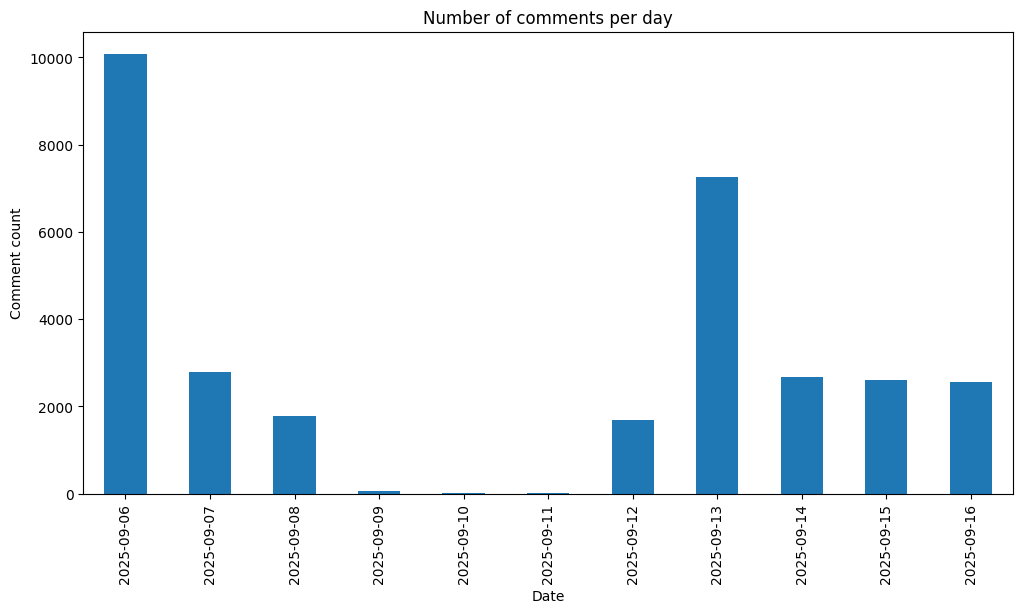

In [ ]:
# Count comments per day
counts = afl_merge.groupby(afl_merge["created_datetime_utc"].dt.date).size()

plt.figure(figsize=(12,6))
counts.plot(kind="bar")
plt.title("Number of comments per day")
plt.xlabel("Date")
plt.ylabel("Comment count")
plt.xticks(rotation=90)
plt.show()

In [51]:
afl_posts = pd.read_csv("afl_posts.csv")
afl_posts.columns

Index(['id', 'title', 'author', 'score', 'num_comments', 'created_utc',
       'created_datetime_utc', 'url', 'permalink', 'subreddit', 'over_18',
       'locked', 'stickied', 'is_self', 'selftext'],
      dtype='object')

In [52]:
afl_posts.created_datetime_utc.min()

'2025-08-26T06:47:36+00:00'